In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('../../Isolation Forest/OrdinalDropIF.csv')
ordinal.shape

(2579, 83)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinal.shape

(2579, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
gb = GradientBoostingRegressor(random_state=1)
cb = CatBoostRegressor(random_state=1, verbose=False)

### n_jobs @ 2, 1, None makes no impact on stacking_regressor.score

In [6]:
stacking_regressor1 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb, n_jobs=2,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [7]:
stacking_regressor1.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff4a162eeb0>,
                  n_jobs=2, passthrough=True)

In [8]:
stacking_regressor1.score(X,y)

0.9902138569960647

In [9]:
stacking_regressor2 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb, n_jobs=1,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [10]:
stacking_regressor2.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff4a162eeb0>,
                  n_jobs=1, passthrough=True)

In [11]:
stacking_regressor2.score(X,y)

0.9902138569960647

In [12]:
stacking_regressor3 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [13]:
stacking_regressor3.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff4a162eeb0>,
                  passthrough=True)

In [14]:
stacking_regressor3.score(X,y)

0.9902138569960647

### cv=5, cv=5, or None has no impact on stacking_regressor.score

In [15]:
stacking_regressor4 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb,
                                        cv=5,
                                        passthrough=True)

In [16]:
stacking_regressor4.fit(X,y)

StackingRegressor(cv=5,
                  estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff4a162eeb0>,
                  passthrough=True)

In [17]:
stacking_regressor4.score(X,y)

0.9900131314412683

In [18]:
stacking_regressor5 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb,
                                        cv=5,
                                        passthrough=True)

In [19]:
stacking_regressor5.fit(X,y)

StackingRegressor(cv=5,
                  estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff4a162eeb0>,
                  passthrough=True)

In [20]:
stacking_regressor5.score(X,y)

0.9900131314412683

In [21]:
stacking_regressor6 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb, passthrough=True)

In [22]:
stacking_regressor6.fit(X,y)

StackingRegressor(estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff4a162eeb0>,
                  passthrough=True)

In [23]:
stacking_regressor6.score(X,y)

0.9900131314412683

### scores1, scores2, scores3 --> produce same results (same StackingRegressor + same cv)

### scores4, scores5, scores5 --> produce same results (same StackingRegressor w/default cv for train, same cv for test)

In [24]:
scores1 = cross_validate(stacking_regressor1, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [25]:
scores1

{'fit_time': array([4.05506301, 4.0650692 , 4.09652209, 4.04659581, 4.06804776]),
 'score_time': array([0.0034349 , 0.00346208, 0.00337982, 0.00345302, 0.00340319]),
 'estimator': [StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff4a1693e80>,
                    n_jobs=2, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff4a1693f40>,
                    n_jobs=2, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                     

In [26]:
scores2 = cross_validate(stacking_regressor2, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [27]:
scores2

{'fit_time': array([5.08423805, 5.11197495, 5.11304188, 5.09768295, 5.08661199]),
 'score_time': array([0.00335407, 0.00338411, 0.0033989 , 0.00340486, 0.004179  ]),
 'estimator': [StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff4a168adc0>,
                    n_jobs=1, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff4a168aca0>,
                    n_jobs=1, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                     

In [28]:
scores3 = cross_validate(stacking_regressor3, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [29]:
scores3

{'fit_time': array([5.07943296, 5.10786724, 5.10538816, 5.08656001, 5.08931184]),
 'score_time': array([0.00338507, 0.00338483, 0.00333095, 0.00334883, 0.0033412 ]),
 'estimator': [StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff4a1167dc0>,
                    passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff4a1167880>,
                    passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 Gradient

In [30]:
scores4 = cross_validate(stacking_regressor4, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [31]:
scores4

{'fit_time': array([5.09425092, 5.10099602, 5.12474298, 5.10913897, 5.11531806]),
 'score_time': array([0.00335717, 0.00334597, 0.00340414, 0.003371  , 0.00336599]),
 'estimator': [StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff4a16937c0>,
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff4a1693fa0>,
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff4c09af040>,
                    passth

In [32]:
scores5 = cross_validate(stacking_regressor5, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [33]:
scores5

{'fit_time': array([5.12578297, 5.12028003, 5.11951208, 5.08875012, 5.09188485]),
 'score_time': array([0.00338483, 0.00338101, 0.00338769, 0.00340891, 0.00338316]),
 'estimator': [StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff4c09c35e0>,
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff4c099f5e0>,
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff4a1167910>,
                    passth

In [34]:
scores6 = cross_validate(stacking_regressor6, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [35]:
scores6

{'fit_time': array([5.09824109, 5.09655428, 5.10630608, 5.08675218, 5.09889007]),
 'score_time': array([0.00335479, 0.00337172, 0.00465679, 0.0034411 , 0.00338674]),
 'estimator': [StackingRegressor(estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff4c09073a0>,
                    passthrough=True),
  StackingRegressor(estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff4a1546700>,
                    passthrough=True),
  StackingRegressor(estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff4c0919e20>,
                    passthrough=True),
  StackingRegressor(estimators=[('GB',
                          

In [36]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, cv=cv, n_jobs=-1)
    
    #scores = cross_validate(model, X, y, scoring=scoring, 
    #                              cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [37]:
cat = evaluate_model(cb, X, y)

In [38]:
cat

,fit_time,score_time,test_score
0,5.770831,0.010916,0.931308
1,6.935994,0.008579,0.946897
2,6.863211,0.009481,0.946280
3,5.834236,0.011352,0.911824
4,7.331308,0.007645,0.949900
5,6.524044,0.007622,0.933133
6,5.762316,0.005504,0.929582
7,6.242294,0.011304,0.926053
8,5.537528,0.007274,0.950737
9,5.580790,0.004448,0.939564


In [39]:
cat = cat[['test_score']].rename(columns={'test_score':'cat_score'})

In [40]:
cat

,cat_score
0,0.931308
1,0.946897
2,0.946280
3,0.911824
4,0.949900
5,0.933133
6,0.929582
7,0.926053
8,0.950737
9,0.939564


In [41]:
g = evaluate_model(gb, X, y)

In [42]:
g

,fit_time,score_time,test_score
0,0.930262,0.002268,0.908753
1,0.922637,0.004823,0.939744
2,0.923094,0.002217,0.936716
3,0.920817,0.002381,0.895961
4,0.940325,0.003183,0.937107
5,0.935041,0.004781,0.915868
6,0.938771,0.002217,0.923176
7,0.944612,0.006128,0.919474
8,0.852227,0.002463,0.941296
9,0.904000,0.002897,0.921069


In [43]:
g = g[['test_score']].rename(columns={'test_score':'gb_score'})

In [44]:
g

,gb_score
0,0.908753
1,0.939744
2,0.936716
3,0.895961
4,0.937107
5,0.915868
6,0.923176
7,0.919474
8,0.941296
9,0.921069


In [45]:
df1 = evaluate_model(stacking_regressor1, X, y)

In [46]:
df1

,fit_time,score_time,test_score
0,14.093595,0.011278,0.926286
1,12.573846,0.012113,0.947589
2,12.281970,0.010720,0.945496
3,13.868316,0.008733,0.905740
4,9.889241,0.006686,0.950007
5,12.270645,0.011008,0.929574
6,12.160661,0.009589,0.933765
7,10.430921,0.006760,0.925759
8,11.755147,0.013746,0.950280
9,10.167492,0.008584,0.931964


In [47]:
df1 = df1[['test_score']].rename(columns={'test_score':'test_score_1'})

In [48]:
df1

,test_score_1
0,0.926286
1,0.947589
2,0.945496
3,0.905740
4,0.950007
5,0.929574
6,0.933765
7,0.925759
8,0.950280
9,0.931964


In [49]:
df2 = evaluate_model(stacking_regressor2, X, y)

In [50]:
df2

,fit_time,score_time,test_score
0,13.464729,0.010116,0.926286
1,12.899283,0.011388,0.947589
2,13.053618,0.012292,0.945496
3,12.833148,0.012079,0.905740
4,12.639927,0.008880,0.950007
5,13.058979,0.007337,0.929574
6,13.522168,0.009947,0.933765
7,13.026003,0.007631,0.925759
8,11.423622,0.005052,0.950280
9,11.390808,0.004516,0.931964


In [51]:
df2 = df2[['test_score']].rename(columns={'test_score':'test_score_2'})

In [52]:
df2

,test_score_2
0,0.926286
1,0.947589
2,0.945496
3,0.905740
4,0.950007
5,0.929574
6,0.933765
7,0.925759
8,0.950280
9,0.931964


In [53]:
df3 = evaluate_model(stacking_regressor3, X, y)

In [54]:
df3

,fit_time,score_time,test_score
0,11.824560,0.009038,0.926286
1,12.113343,0.006658,0.947589
2,11.455865,0.007872,0.945496
3,11.178938,0.015266,0.905740
4,11.402817,0.008807,0.950007
5,11.663061,0.017548,0.929574
6,11.292655,0.010200,0.933765
7,11.535917,0.010664,0.925759
8,11.556341,0.005467,0.950280
9,8.879864,0.008133,0.931964


In [55]:
df3 = df3[['test_score']].rename(columns={'test_score':'test_score_3'})

In [56]:
df3

,test_score_3
0,0.926286
1,0.947589
2,0.945496
3,0.905740
4,0.950007
5,0.929574
6,0.933765
7,0.925759
8,0.950280
9,0.931964


In [57]:
df4 = evaluate_model(stacking_regressor4, X, y)

In [58]:
df4

,fit_time,score_time,test_score
0,12.172346,0.011949,0.923769
1,11.279187,0.007965,0.948160
2,12.019094,0.009979,0.943670
3,11.691522,0.012675,0.906592
4,11.248648,0.009097,0.949078
5,12.037672,0.014321,0.928476
6,11.358315,0.009811,0.933644
7,11.347232,0.008930,0.925781
8,9.863031,0.006384,0.950220
9,9.892531,0.005874,0.934893


In [59]:
df4 = df4[['test_score']].rename(columns={'test_score':'test_score_4'})

In [60]:
df4

,test_score_4
0,0.923769
1,0.948160
2,0.943670
3,0.906592
4,0.949078
5,0.928476
6,0.933644
7,0.925781
8,0.950220
9,0.934893


In [61]:
df5 = evaluate_model(stacking_regressor5, X, y)

In [62]:
df5

,fit_time,score_time,test_score
0,11.735858,0.016628,0.923769
1,11.402497,0.007061,0.948160
2,11.397654,0.008826,0.943670
3,11.875191,0.008112,0.906592
4,11.397541,0.006819,0.949078
5,11.267169,0.021768,0.928476
6,11.312410,0.009671,0.933644
7,11.417125,0.008113,0.925781
8,10.228969,0.004317,0.950220
9,10.159180,0.007520,0.934893


In [63]:
df5 = df5[['test_score']].rename(columns={'test_score':'test_score_5'})

In [64]:
df5

,test_score_5
0,0.923769
1,0.948160
2,0.943670
3,0.906592
4,0.949078
5,0.928476
6,0.933644
7,0.925781
8,0.950220
9,0.934893


In [65]:
df6 = evaluate_model(stacking_regressor6, X, y)

In [66]:
df6

,fit_time,score_time,test_score
0,13.358779,0.009558,0.923769
1,12.849612,0.018391,0.948160
2,12.750529,0.017972,0.943670
3,10.425707,0.003875,0.906592
4,10.215303,0.003940,0.949078
5,12.830792,0.009825,0.928476
6,10.879552,0.010567,0.933644
7,12.886860,0.010138,0.925781
8,11.487413,0.018772,0.950220
9,11.809597,0.014318,0.934893


In [67]:
df6 = df6[['test_score']].rename(columns={'test_score':'test_score_6'})

In [68]:
df6

,test_score_6
0,0.923769
1,0.948160
2,0.943670
3,0.906592
4,0.949078
5,0.928476
6,0.933644
7,0.925781
8,0.950220
9,0.934893


In [69]:
combo = pd.concat([cat, g, df1, df2, df3, df4, df5, df6], axis=1)

In [70]:
combo

,cat_score,gb_score,test_score_1,test_score_2,test_score_3,test_score_4,test_score_5,test_score_6
0,0.931308,0.908753,0.926286,0.926286,0.926286,0.923769,0.923769,0.923769
1,0.946897,0.939744,0.947589,0.947589,0.947589,0.948160,0.948160,0.948160
2,0.946280,0.936716,0.945496,0.945496,0.945496,0.943670,0.943670,0.943670
3,0.911824,0.895961,0.905740,0.905740,0.905740,0.906592,0.906592,0.906592
4,0.949900,0.937107,0.950007,0.950007,0.950007,0.949078,0.949078,0.949078
5,0.933133,0.915868,0.929574,0.929574,0.929574,0.928476,0.928476,0.928476
6,0.929582,0.923176,0.933765,0.933765,0.933765,0.933644,0.933644,0.933644
7,0.926053,0.919474,0.925759,0.925759,0.925759,0.925781,0.925781,0.925781
8,0.950737,0.941296,0.950280,0.950280,0.950280,0.950220,0.950220,0.950220
9,0.939564,0.921069,0.931964,0.931964,0.931964,0.934893,0.934893,0.934893


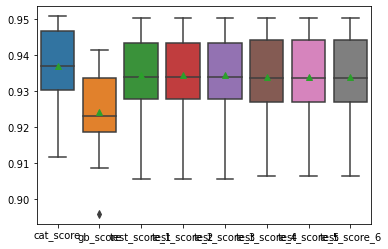

In [71]:
sns.boxplot(data=combo, showmeans=True);

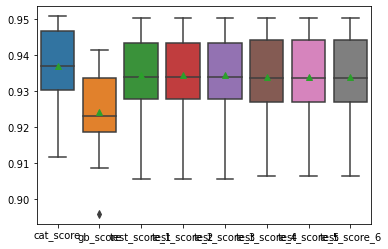

In [72]:
sns.boxplot(data=combo, showmeans=True);

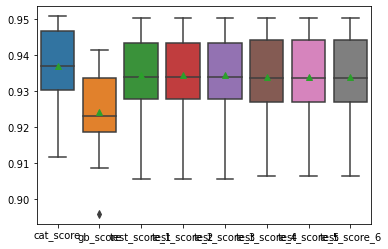

In [73]:
sns.boxplot(data=combo, showmeans=True);

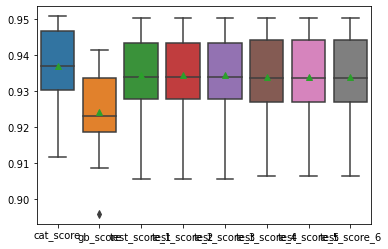

In [74]:
sns.boxplot(data=combo, showmeans=True);

In [75]:
combo.describe()

,cat_score,gb_score,test_score_1,test_score_2,test_score_3,test_score_4,test_score_5,test_score_6
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.936878,0.924317,0.934417,0.934417,0.934417,0.933957,0.933957,0.933957
std,0.011131,0.012277,0.012178,0.012178,0.012178,0.012242,0.012242,0.012242
min,0.911824,0.895961,0.905740,0.905740,0.905740,0.906592,0.906592,0.906592
25%,0.930445,0.918784,0.927930,0.927930,0.927930,0.927128,0.927128,0.927128
50%,0.936986,0.923176,0.933977,0.933977,0.933977,0.933644,0.933644,0.933644
75%,0.946589,0.933732,0.943374,0.943374,0.943374,0.944266,0.944266,0.944266
max,0.950737,0.941296,0.950280,0.950280,0.950280,0.950220,0.950220,0.950220


In [76]:
combo.describe()

,cat_score,gb_score,test_score_1,test_score_2,test_score_3,test_score_4,test_score_5,test_score_6
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.936878,0.924317,0.934417,0.934417,0.934417,0.933957,0.933957,0.933957
std,0.011131,0.012277,0.012178,0.012178,0.012178,0.012242,0.012242,0.012242
min,0.911824,0.895961,0.905740,0.905740,0.905740,0.906592,0.906592,0.906592
25%,0.930445,0.918784,0.927930,0.927930,0.927930,0.927128,0.927128,0.927128
50%,0.936986,0.923176,0.933977,0.933977,0.933977,0.933644,0.933644,0.933644
75%,0.946589,0.933732,0.943374,0.943374,0.943374,0.944266,0.944266,0.944266
max,0.950737,0.941296,0.950280,0.950280,0.950280,0.950220,0.950220,0.950220


In [77]:
combo.describe()

,cat_score,gb_score,test_score_1,test_score_2,test_score_3,test_score_4,test_score_5,test_score_6
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.936878,0.924317,0.934417,0.934417,0.934417,0.933957,0.933957,0.933957
std,0.011131,0.012277,0.012178,0.012178,0.012178,0.012242,0.012242,0.012242
min,0.911824,0.895961,0.905740,0.905740,0.905740,0.906592,0.906592,0.906592
25%,0.930445,0.918784,0.927930,0.927930,0.927930,0.927128,0.927128,0.927128
50%,0.936986,0.923176,0.933977,0.933977,0.933977,0.933644,0.933644,0.933644
75%,0.946589,0.933732,0.943374,0.943374,0.943374,0.944266,0.944266,0.944266
max,0.950737,0.941296,0.950280,0.950280,0.950280,0.950220,0.950220,0.950220
